In [2]:
from sklearn.datasets import fetch_california_housing #type: ignore
from matplotlib import pyplot as plt #type: ignore
import pandas as pd
import numpy as np

We need a dataset with numerical features and a continuous target variable (price).

Option A (Recommended for Simplicity & Learning): California Housing Dataset
Source: Available directly through scikit-learn.
Why: Well-structured, numerical features, decent size, easy to load. You can start with just one feature (e.g., median income MedInc) to predict MedHouseVal (median house value) to simplify initial gradient calculations and visualization.

In [10]:
housing = fetch_california_housing(as_frame=True)
#print(housing)
df = housing.frame
# For simplicity, let's start with one feature and the target
# You can expand to more features later
df_simple = df[['MedInc', 'MedHouseVal']].copy()
df_simple.rename(columns={'MedInc': 'Feature', 'MedHouseVal': 'Target'}, inplace=True)
print(df_simple)
print(df_simple.info())
print(df_simple.describe())

       Feature  Target
0       8.3252   4.526
1       8.3014   3.585
2       7.2574   3.521
3       5.6431   3.413
4       3.8462   3.422
...        ...     ...
20635   1.5603   0.781
20636   2.5568   0.771
20637   1.7000   0.923
20638   1.8672   0.847
20639   2.3886   0.894

[20640 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  20640 non-null  float64
 1   Target   20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB
None
            Feature        Target
count  20640.000000  20640.000000
mean       3.870671      2.068558
std        1.899822      1.153956
min        0.499900      0.149990
25%        2.563400      1.196000
50%        3.534800      1.797000
75%        4.743250      2.647250
max       15.000100      5.000010


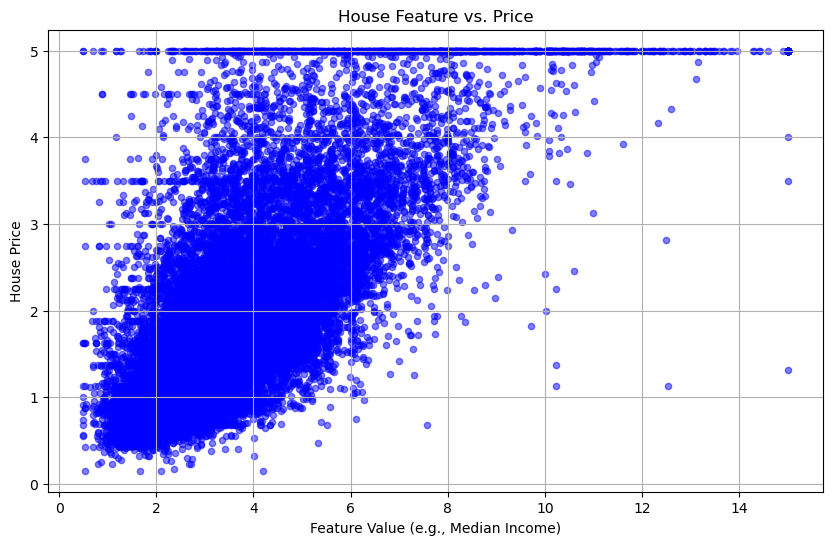

In [3]:
# For df_simple (using California or Synthetic)
# X will be your feature(s), y will be your target
X_data = df_simple[['Feature']].values
y_data = df_simple[['Target']].values.reshape(-1, 1) # Ensure y is a column vector

plt.figure(figsize=(10, 6)) # Adjust figure size for better visibility
plt.scatter(X_data, y_data, color='blue', alpha=0.5, s=20) # s is marker size, alpha is transparency
plt.title('House Feature vs. Price')
plt.xlabel('Feature Value (e.g., Median Income)')
plt.ylabel('House Price')
plt.grid(True) # Optional: adds a grid
plt.show()



Feature Scaling: Gradient descent can converge much faster if features are on a similar scale. Standardize your features (subtract mean, divide by standard deviation).

Recall concept of standardization in statistic: z = (x - u) / s
where u stands for mean and
s stands for standard deviation

In [16]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_data)
print(X_scaled)

# Optional: Scale target as well, or scale it back after prediction
# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y_data)

[[ 2.34476576]
 [ 2.33223796]
 [ 1.7826994 ]
 ...
 [-1.14259331]
 [-1.05458292]
 [-0.78012947]]


Train-Test Split: Split your data to evaluate your model on unseen data.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.32165429]
 [-0.03061993]
 [ 0.1503488 ]
 ...
 [-0.49283239]
 [ 0.97302487]
 [-0.68174943]]
[[-1.15248922]
 [-0.70501534]
 [-0.20558796]
 ...
 [ 2.82092723]
 [-0.57147326]
 [-0.16768875]]
[[1.03 ]
 [3.821]
 [1.726]
 ...
 [2.221]
 [2.835]
 [3.25 ]]
[[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [5.00001]
 [0.723  ]
 [1.515  ]]


Add Bias Term (x0=1): For linear regression y = w0*x0 + w1*x1 + ..., where x0 is always 1, allowing w0 to be the intercept.

In [20]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # Add x0 = 1 to each instance
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

print(X_train_b)
print(X_test_b)


[[ 1.         -0.32165429]
 [ 1.         -0.03061993]
 [ 1.          0.1503488 ]
 ...
 [ 1.         -0.49283239]
 [ 1.          0.97302487]
 [ 1.         -0.68174943]]
[[ 1.         -1.15248922]
 [ 1.         -0.70501534]
 [ 1.         -0.20558796]
 ...
 [ 1.          2.82092723]
 [ 1.         -0.57147326]
 [ 1.         -0.16768875]]


Phase 2: Implementing Gradient Descent Variants

Core Concepts for Linear Regression:
    Hypothesis: h(X, θ) = X @ θ (where @ is matrix multiplication, X includes the bias column)
    Cost Function (MSE): J(θ) = (1 / (2*m)) * Σ(h(X_i, θ) - y_i)²
    Or in matrix form: J(θ) = (1 / (2*m)) * (X @ θ - y).T @ (X @ θ - y)
    Gradient of MSE: ∇J(θ) = (1/m) * X.T @ (X @ θ - y)


    
Implementation (Python with NumPy):
    1, Initialize Parameters:
        a. theta = np.random.randn(X_train_b.shape[1], 1) (number of features + 1 bias term)


        
Batch Gradient Descent (BGD):
    1, Loop for a fixed number of epochs or until convergence.
    2,In each epoch:
        (a) Calculate predictions: predictions = X_train_b @ theta
        (b) Calculate error: error = predictions - y_train
        (c) Calculate gradient: gradients = (1 / m) * X_train_b.T @ error (where m is X_train_b.shape[0])
        (d) Update theta: theta = theta - learning_rate * gradients
    3, Store the cost J(θ) at each epoch to plot the learning curve.


    
Stochastic Gradient Descent (SGD):
    1, Loop for a fixed number of epochs.
    2, In each epoch:
        (a)Shuffle the training data (X_train_b, y_train).
        (b)Loop through each training instance (X_i, y_i):
            (b1) Calculate prediction for that instance: prediction_i = X_i @ theta (X_i is a single row)
            (b2) Calculate error: error_i = prediction_i - y_i
            (b3) Calculate gradient for that instance: gradient_i = X_i.T @ error_i (Note: no 1/m here for a single instance, though some definitions include it. The learning rate effectively absorbs this.)
            (b4) Update theta: theta = theta - learning_rate * gradient_i
    3, You might want a learning rate schedule (e.g., decreasing learning_rate over time).
    4, Store cost (perhaps averaged over the epoch or periodically) to plot.


    
Mini-Batch Gradient Descent (MBGD):
    1, Loop for a fixed number of epochs.
    2, In each epoch:
        (a) Shuffle the training data.
        (b) Divide data into mini-batches of batch_size.
        (c) For each mini-batch (X_batch, y_batch):
            (c1) Calculate predictions: predictions_batch = X_batch @ theta
            (c2) Calculate error: error_batch = predictions_batch - y_batch
            (c3) Calculate gradient: gradients_batch = (1 / batch_size) * X_batch.T @ error_batch
            (c4) Update theta: theta = theta - learning_rate * gradients_batch
    3, Store cost to plot.



Key Parameters to Tune:
    1, learning_rate (alpha): Crucial. Too small = slow convergence. Too large = divergence.
    2, epochs: Number of passes through the entire dataset.
    3, batch_size (for MBGD): Typically powers of 2 (e.g., 32, 64, 128).

!!!!!!!!!!!!First, initialize the parameters!!!!!!!!!!!!!!!!

In [90]:
# --- Batch Gradient Descent ---

# --- Initialize Theta ---
num_params = X_train_b.shape[1] # Number of columns in X_train_b (features + bias)
theta = np.random.randn(num_params, 1) # Initialize theta as (num_params, 1)
# Or: theta = np.zeros((num_params, 1))
print("Initial theta shape:", theta.shape) # Should be (2, 1)
print("Initial theta:\n", theta)

m = X_train_b.shape[0]
learning_rate = 0.1
epochs = 100 # Increased iterations for better convergence

print("\nStarting BGD...")
for i in range(epochs): # Renamed loop variable to epochs for clarity
    predictions = X_train_b @ theta
    error = predictions - y_train
    gradients = (1 / m) * X_train_b.T @ error
    theta = theta - learning_rate * gradients

    if (i + 1) % 10 == 0: # Print cost or theta every 10 epochs
        cost = np.sum(error**2) / (2 * m)
        print(f"Epoch {i+1}/{epochs}, Cost: {cost:.4f}, Theta: {theta.flatten()}")
    if np.isnan(theta).any() or np.isinf(theta).any():
        print(f"Error: NaN or Inf in theta at epoch {i+1}. Stopping.")
        break

print("\nFinal theta:\n", theta)
# Expected theta for this synthetic data is around [[4], [3]]

Initial theta shape: (2, 1)
Initial theta:
 [[0.19929731]
 [0.28672984]]

Starting BGD...
Epoch 10/100, Cost: 0.6302, Theta: [1.41727629 0.62361352]
Epoch 20/100, Cost: 0.3835, Theta: [1.84127484 0.73796501]
Epoch 30/100, Cost: 0.3537, Theta: [1.98888172 0.7767587 ]
Epoch 40/100, Cost: 0.3501, Theta: [2.04027028 0.78991171]
Epoch 50/100, Cost: 0.3496, Theta: [2.05816166 0.79436849]
Epoch 60/100, Cost: 0.3496, Theta: [2.06439095 0.79587765]
Epoch 70/100, Cost: 0.3496, Theta: [2.06655991 0.79638833]
Epoch 80/100, Cost: 0.3496, Theta: [2.06731515 0.79656101]
Epoch 90/100, Cost: 0.3496, Theta: [2.06757813 0.79661936]
Epoch 100/100, Cost: 0.3496, Theta: [2.06766971 0.79663906]

Final theta:
 [[2.06766971]
 [0.79663906]]



Starting SGD...
Epoch 10/50, Average Cost: 0.2295, Theta: [2.14465708 0.80660266]
Epoch 20/50, Average Cost: 0.2328, Theta: [2.22901695 0.87053542]
Epoch 30/50, Average Cost: 0.2308, Theta: [2.04084724 0.70623794]
Epoch 40/50, Average Cost: 0.2361, Theta: [2.01438935 0.79433943]
Epoch 50/50, Average Cost: 0.2229, Theta: [2.22926112 0.82386827]

Final theta after SGD:
 [[2.22926112]
 [0.82386827]]


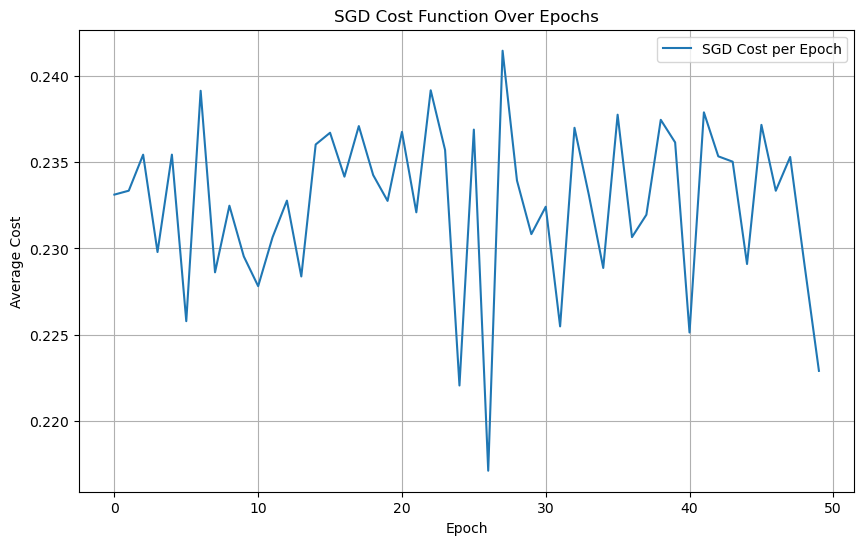

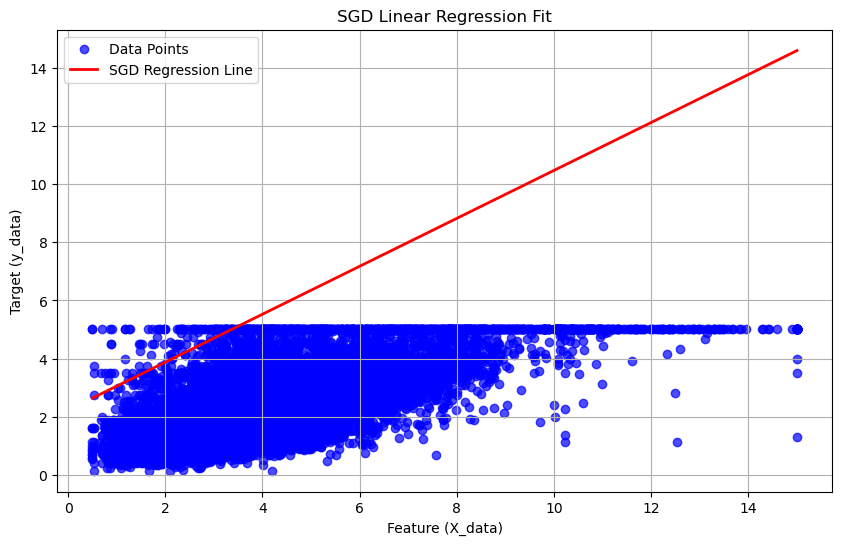

In [89]:
# ---  Stochastic Gradient Descent (SGD) ---

# --- Synthesize Data (or load and preprocess your actual data) ---
np.random.seed(42) # For reproducibility
m_samples = 100
n_features = 1 # Single feature for simplicity
epochs = 50  # Number of passes through the entire dataset
learning_rate_initial = 0.05 # Initial learning rate
t0, t1 = 5, 50 # Parameters for learning rate schedule (hyperparameters)




# Optional: Store cost history for plotting
cost_history_sgd = []




# Learning rate schedule function (example: decreasing over time)
def learning_schedule(t, t0, t1):
    return t0 / (t + t1)

print("\nStarting SGD...")
for epoch in range(epochs):
    # Shuffle the training data at the beginning of each epoch (important for SGD)
    # This ensures that the model sees instances in a random order.
    shuffled_indices = np.random.permutation(m_samples)
    X_train_b_shuffled = X_train_b[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    epoch_cost = 0 # To calculate average cost for this epoch

    for i in range(m_samples): # Iterate through each training instance
        # Select a single random instance (or iterate sequentially after shuffling)
        xi = X_train_b_shuffled[i:i+1] # Shape: (1, num_params)
        yi = y_train_shuffled[i:i+1]   # Shape: (1, 1)

        # Calculate prediction for this instance
        prediction_i = xi @ theta      # Shape: (1, 1)

        # Calculate error for this instance
        error_i = prediction_i - yi    # Shape: (1, 1)

        # Calculate gradient for this instance
        # For MSE with a single instance, gradient is xi.T @ error_i
        # (The 1/m factor is often absorbed into the learning rate for SGD,
        # or considered as m=1 for the single instance)
        gradients_i = xi.T @ error_i   # Shape: (num_params, 1)

        # Update learning rate (optional: use a schedule)
        # current_learning_rate = learning_schedule(epoch * m_samples + i, t0, t1)
        current_learning_rate = learning_rate_initial # Or a fixed one for simplicity initially

        # Update theta based on this single instance's gradient
        theta = theta - current_learning_rate * gradients_i

        # Accumulate cost for this instance (optional, for monitoring)
        instance_cost = (error_i**2) / 2 # Cost for one instance (MSE without 1/m)
        epoch_cost += instance_cost.item() # .item() to get scalar from (1,1) array

    # Store average cost for the epoch
    average_epoch_cost = epoch_cost / m_samples
    cost_history_sgd.append(average_epoch_cost)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Average Cost: {average_epoch_cost:.4f}, Theta: {theta.flatten()}")
        # You can also decrease learning_rate_initial here if not using a schedule per iteration
        # learning_rate_initial *= 0.9 # Example simple decay

print("\nFinal theta after SGD:\n", theta)
# Expected theta for this synthetic data is around [[4], [3]]

# --- 5. Plotting (Optional) ---
# Plot Cost History
plt.figure(figsize=(10,6))
plt.plot(range(epochs), cost_history_sgd, label='SGD Cost per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')
plt.title('SGD Cost Function Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data and the learned regression line
plt.figure(figsize=(10,6))
plt.scatter(X_data, y_data, color='blue', alpha=0.7, label='Data Points')
# Generate points for the line using the final theta
X_line = np.array([[X_data.min()], [X_data.max()]]) # Min and max X values
X_line_b = np.c_[np.ones((2, 1)), X_line] # Add bias term
y_line_pred = X_line_b @ theta
plt.plot(X_line, y_line_pred, color='red', linewidth=2, label='SGD Regression Line')
plt.xlabel('Feature (X_data)')
plt.ylabel('Target (y_data)')
plt.title('SGD Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


Starting Mini-Batch GD...
Epoch 10/50, Average Cost: 0.3441, Theta: [2.08700247 0.87085006]
Epoch 20/50, Average Cost: 0.3429, Theta: [2.08687834 0.87047846]
Epoch 30/50, Average Cost: 0.3428, Theta: [2.08548242 0.87044804]
Epoch 40/50, Average Cost: 0.3431, Theta: [2.08985037 0.87142717]
Epoch 50/50, Average Cost: 0.3430, Theta: [2.09065707 0.87338921]

Final theta after Mini-Batch GD:
 [[2.09065707]
 [0.87338921]]


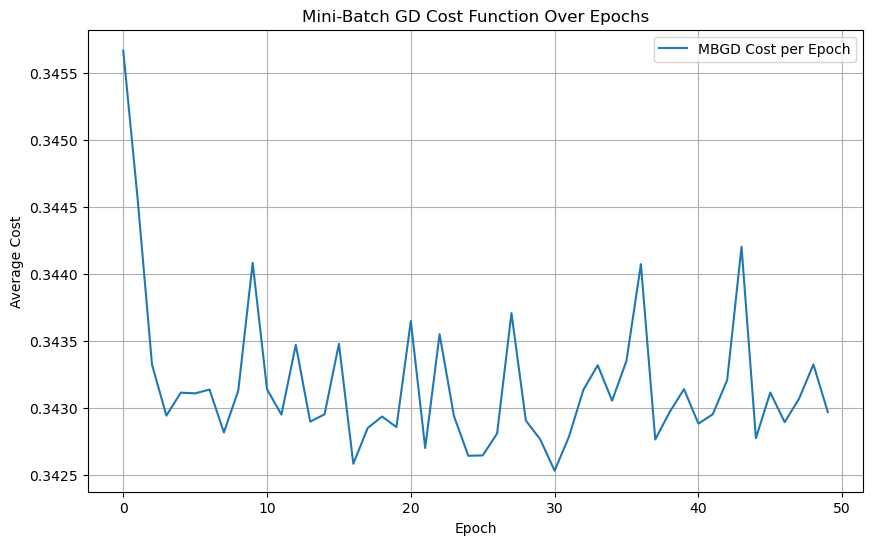

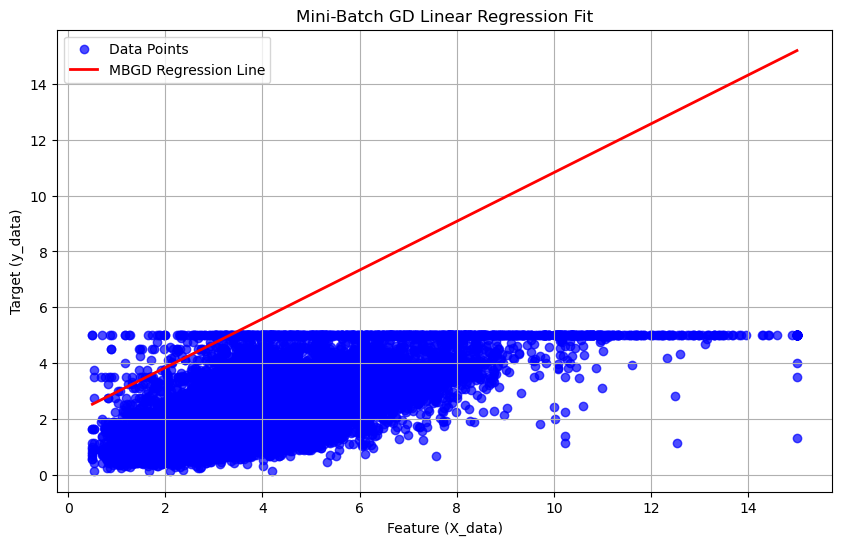

In [92]:
#MBGD Mini-Batch Gradient Descent:

epochs = 50
learning_rate = 0.05
batch_size = 32 # Common mini-batch size (e.g., 16, 32, 64, 128)

# Optional: Store cost history
cost_history_mbgd = []

print("\nStarting Mini-Batch GD...")
for epoch in range(epochs):
    # Shuffle the training data at the beginning of each epoch
    shuffled_indices = np.random.permutation(m_samples)
    X_train_b_shuffled = X_train_b[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    epoch_cost = 0 # To calculate average cost for this epoch

    # Iterate over mini-batches
    for i in range(0, m_samples, batch_size):
        # Get the current mini-batch
        xi_batch = X_train_b_shuffled[i : i + batch_size]
        yi_batch = y_train_shuffled[i : i + batch_size]

        # Calculate predictions for the mini-batch
        # xi_batch shape: (batch_size, num_params)
        # theta shape: (num_params, 1)
        predictions_batch = xi_batch @ theta # Shape: (batch_size, 1)

        # Calculate error for the mini-batch
        error_batch = predictions_batch - yi_batch # Shape: (batch_size, 1)

        # Calculate gradient for the mini-batch
        # The 1/m term becomes 1/batch_size
        # xi_batch.T shape: (num_params, batch_size)
        # error_batch shape: (batch_size, 1)
        gradients_batch = (1 / batch_size) * xi_batch.T @ error_batch # Shape: (num_params, 1)

        # Update theta based on this mini-batch's gradient
        theta = theta - learning_rate * gradients_batch

        # Accumulate cost for this batch (optional, for monitoring)
        batch_cost = np.sum(error_batch**2) / (2 * batch_size) # MSE for the batch
        epoch_cost += batch_cost * batch_size # Weight by batch size to get total epoch cost later

    # Store average cost for the epoch
    average_epoch_cost = epoch_cost / m_samples
    cost_history_mbgd.append(average_epoch_cost)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Average Cost: {average_epoch_cost:.4f}, Theta: {theta.flatten()}")
        # Optional: Implement a learning rate schedule here if desired
        # learning_rate *= 0.95

print("\nFinal theta after Mini-Batch GD:\n", theta)

# --- 5. Plotting (Optional) ---
# Plot Cost History
plt.figure(figsize=(10,6))
plt.plot(range(epochs), cost_history_mbgd, label='MBGD Cost per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')
plt.title('Mini-Batch GD Cost Function Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data and the learned regression line
plt.figure(figsize=(10,6))
plt.scatter(X_data, y_data, color='blue', alpha=0.7, label='Data Points')
X_line = np.array([[X_data.min()], [X_data.max()]])
X_line_b = np.c_[np.ones((2, 1)), X_line]
y_line_pred = X_line_b @ theta
plt.plot(X_line, y_line_pred, color='red', linewidth=2, label='MBGD Regression Line')
plt.xlabel('Feature (X_data)')
plt.ylabel('Target (y_data)')
plt.title('Mini-Batch GD Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
